In [356]:
import pandas as pd
import matplotlib.pyplot as plt


In [357]:
df=pd.read_csv('level-2-tickets-all-status-view-2024-10-10-0536.csv')

In [358]:
# Data Cleaning
df

,ID,Status,Subject,Requester,Requested,Assignee,Group,Issue Type,Client Support Request Issue Type
0,188458,Solved,Deposco | ATL - TIPSYELVES | orders are stuck ...,Sandeep Padma,2024-10-10 05:26,Sandeep Padma,Application Support,NaN,NaN
1,188444,Open,Tipsy order SO4753911,Brandon Anderson,2024-10-09 16:02,Rahul Gupta,Application Support,NaN,Outbound
2,188435,Solved,Orders Stuck in Deposco,Jordin,2024-10-09 14:20,Shirish Kumar,Application Support,NaN,Deposco
3,188427,Open,#587007 - Resending Request to Ship Order ASAP,Clozada,2024-10-09 14:03,Mehay Zabeen Shaik,Application Support,NaN,Outbound
4,188405,Open,Updated SaturdaysNYC Rate Card,Sunny Dhaliwal,2024-10-09 12:57,Shirish Kumar,Application Support,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1449,175248,Closed,Invoice Alert: SES / Edge Delivery Parcels Mis...,Chaitanya Middela,2024-04-08 14:42,Smarun Inala,Application Support,Other,NaN
1450,173972,Closed,Update Partner/Ops portal to show the latest t...,Joel Paroz,2024-03-18 12:15,Smarun Inala,Application Support,Reporting Issues,NaN
1451,171801,Closed,Lot Tracking Not Transmitting Into Deposco,Leslie Maldonado,2024-02-07 14:59,Smarun Inala,Application Support,NaN,NaN
1452,171683,Closed,DV3 - Jackson / Mgemi / Inbound Issue,Lauren Austin,2024-02-06 09:37,Sandeep Padma,Application Support,Reporting Issues,NaN


In [359]:
df.isnull() 

#issue type column and Client Support Request Issue Type column contain lots of missing value Drop the coloumn
Cleaned_data=df.drop(columns=['Issue Type','Client Support Request Issue Type'],inplace=False) #Drop use to Dro[ the column

In [360]:
Cleaned_data

,ID,Status,Subject,Requester,Requested,Assignee,Group
0,188458,Solved,Deposco | ATL - TIPSYELVES | orders are stuck ...,Sandeep Padma,2024-10-10 05:26,Sandeep Padma,Application Support
1,188444,Open,Tipsy order SO4753911,Brandon Anderson,2024-10-09 16:02,Rahul Gupta,Application Support
2,188435,Solved,Orders Stuck in Deposco,Jordin,2024-10-09 14:20,Shirish Kumar,Application Support
3,188427,Open,#587007 - Resending Request to Ship Order ASAP,Clozada,2024-10-09 14:03,Mehay Zabeen Shaik,Application Support
4,188405,Open,Updated SaturdaysNYC Rate Card,Sunny Dhaliwal,2024-10-09 12:57,Shirish Kumar,Application Support
...,...,...,...,...,...,...,...
1449,175248,Closed,Invoice Alert: SES / Edge Delivery Parcels Mis...,Chaitanya Middela,2024-04-08 14:42,Smarun Inala,Application Support
1450,173972,Closed,Update Partner/Ops portal to show the latest t...,Joel Paroz,2024-03-18 12:15,Smarun Inala,Application Support
1451,171801,Closed,Lot Tracking Not Transmitting Into Deposco,Leslie Maldonado,2024-02-07 14:59,Smarun Inala,Application Support
1452,171683,Closed,DV3 - Jackson / Mgemi / Inbound Issue,Lauren Austin,2024-02-06 09:37,Sandeep Padma,Application Support


In [361]:
# Tickets by Status

Status
Closed     1349
Solved       72
Open         20
On-hold       7
Pending       6
Name: count, dtype: int64


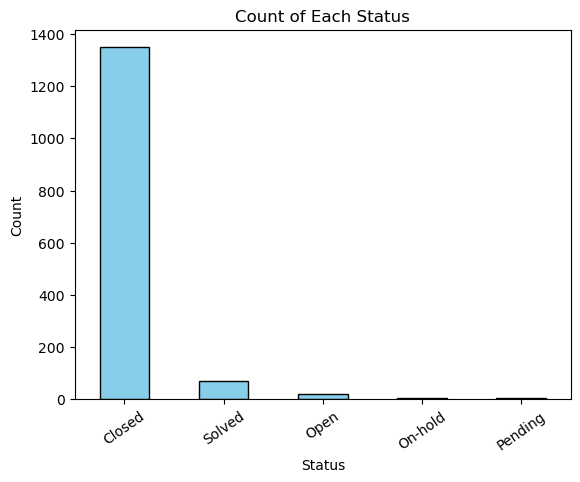

In [362]:
Ticket_by_status=Cleaned_data['Status'].value_counts()
print(Ticket_by_status)
Cleaned_data['Status'].value_counts().plot(kind='bar', color='Skyblue', edgecolor='Black')
plt.title('Count of Each Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=35)  # Rotate x-axis labels for better visibility
plt.show()


Assignee
Mehay Zabeen Shaik    285
Sandeep Padma         280
Shirish Kumar         256
Rahul Gupta           200
Karthik Salanke       110
Smarun Inala          108
Hari Nama              90
Chaitanya Middela      87
Sean Johnson           13
Dawid Koldras           7
Shoban Kothuru          6
Gopinath Kumar          5
Zach Teves              2
David Aguilera          1
Ian McIntyre            1
Name: count, dtype: int64


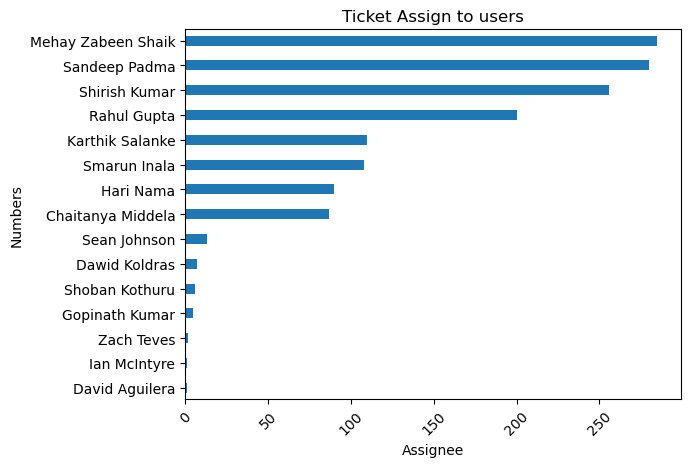

In [363]:
Ticket_Assignee_users=df['Assignee'].value_counts()
print(Ticket_Assignee_users)

df['Assignee'].value_counts(ascending=True).plot(kind='barh',width=0.4)
plt.title('Ticket Assign to users')
plt.xlabel('Assignee')
plt.ylabel('Numbers')
plt.xticks(rotation=45)
plt.show()



In [364]:
# Max number of Ticket in A Single Day
#Extract the Date and Remove the time (Hours and Mins)
print(df['Requested'].dtype) #Change the object type to Datetime

df['Requested']=pd.to_datetime(df['Requested'])

print(df['Requested'].dtype) #Changed the to Datetime
df['Requested']=df['Requested'].dt.date # Extract the date onle mins has been removed

Max_ticket_date=df['Requested'].idxmax()
Count=df['Requested'].value_counts().max()

print('Max tickets in a single', Max_ticket_date, Count)
# Count=df['Requested'].value_counts().plot(kind='bar')







object
datetime64[ns]
Max tickets in a single 0 26


In [365]:
df.columns

Index(['ID', 'Status', 'Subject', 'Requester', 'Requested', 'Assignee',
       'Group', 'Issue Type', 'Client Support Request Issue Type'],
      dtype='object')

Number of entry 1454
Number of unique Subjects 1061
Axes(0.125,0.11;0.775x0.77)


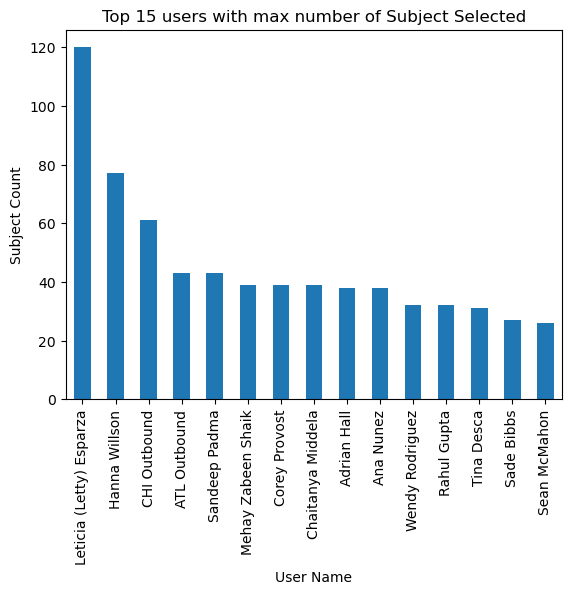

In [366]:
#Number of Subject Selected by User while Creating a ticket 
Numbers_of_Entry=len(df['Subject'])
print('Number of entry', Numbers_of_Entry)

Unique_Subjects=len(df['Subject'].unique())
print('Number of unique Subjects',Unique_Subjects)

# User_subject_counts=df.groupby('Requester')['Subject'].count().sort_values(ascending=False)
# print(User_subject_counts)
# Top 10 users with max numbers of subject

Top_15_user=df.groupby('Requester')['Subject'].count().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Top 15 users with max number of Subject Selected')
plt.xlabel('User Name')
plt.ylabel('Subject Count')
# plt.xticks(rotation=30)
print(Top_15_user)

object


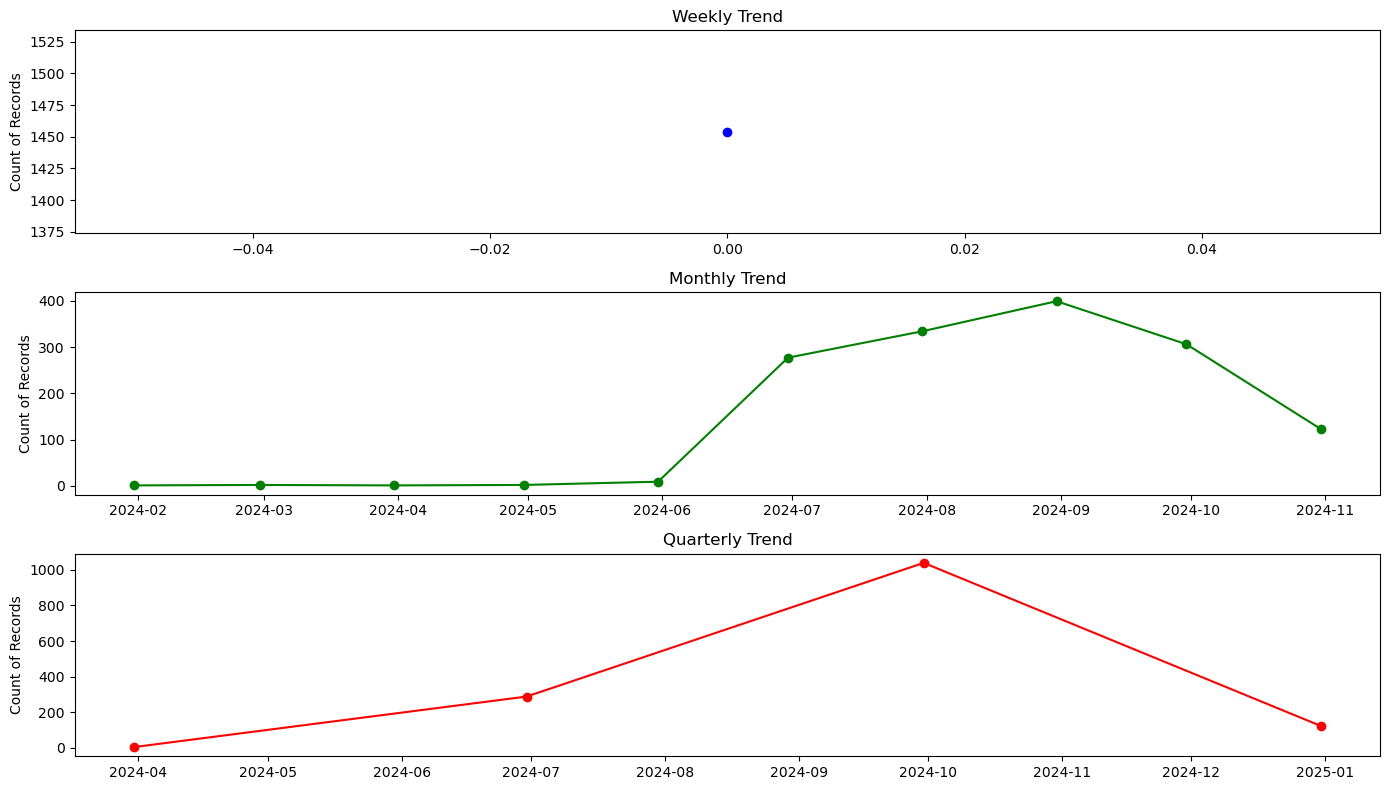

In [367]:
#Calculate trend of tickets
#Weekly trend
print(df['Requested'].dtype) #Current Type is object 

#Change the object into Date Format
df['Requested']=pd.to_datetime(df['Requested'])

df.set_index('Requested', inplace=True) # Set 'Date' as the index

# Weekly trend
weekly_trend = df.resample('W').size()

# Monthly trend
monthly_trend = df.resample('M').size()

# Quarterly trend
quarterly_trend = df.resample('Q').size()

# Plot the trends
plt.figure(figsize=(14, 8))

# Plot weekly trend
plt.subplot(3, 1, 1)
plt.plot(weekly_trend, marker='o', color='b')
plt.title('Weekly Trend')
plt.ylabel('Count of Records')

# Plot monthly trend
plt.subplot(3, 1, 2)
plt.plot(monthly_trend, marker='o', color='g')
plt.title('Monthly Trend')
plt.ylabel('Count of Records')

# Plot quarterly trend
plt.subplot(3, 1, 3)
plt.plot(quarterly_trend, marker='o', color='r')
plt.title('Quarterly Trend')
plt.ylabel('Count of Records')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


